# Practice

In [4]:
# X: tip을 제외한 나머지 인자
# Y: tip
# X인자를 활용하여 tip을 예측할 수 있는 모델 구축
tips = sns.load_dataset('tips')

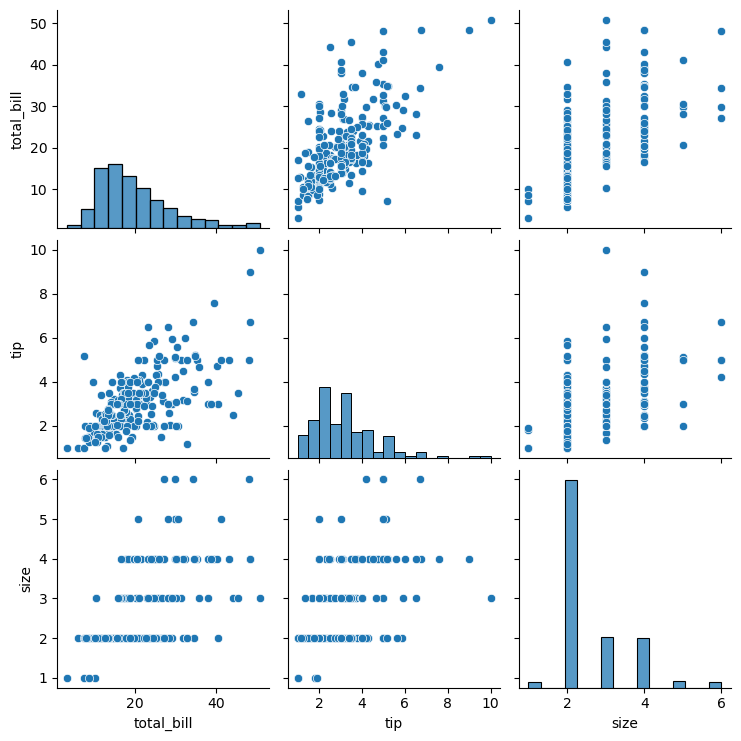

In [20]:
sns.pairplot(tips)

In [19]:
model = sm.OLS.from_formula('tip ~ scale(total_bill) + scale(size)', tips).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           9.67e-34
Time:                        09:37:31   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9983      0.065     46.210      0.000       2.870       3.126
scale(total_bill)     0.8237      0.081     10.172      0.000       0.664       0.983
scale(size)           0.1828      0.081      2.258      0.025       0.023       0.342
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         1.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
data = pd.read_csv('./data/국민건강보험공단_건강검진정보_2023.CSV', encoding='cp949')

In [6]:
# 허리둘레에 대한 모델링
# y: 허리둘레
# x: 자유롭게
data = data.iloc[:, :-6]

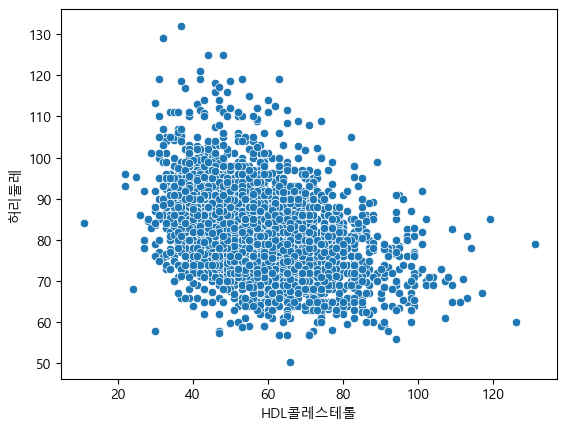

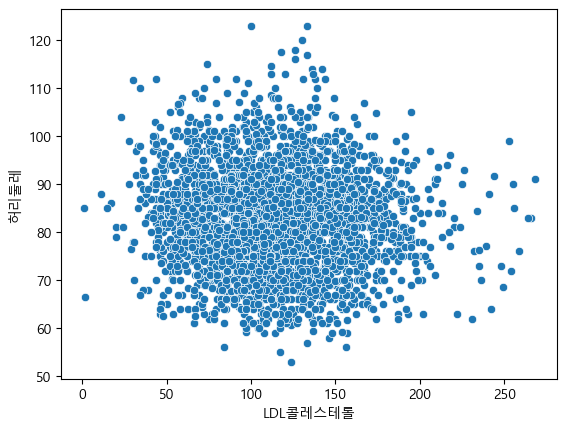

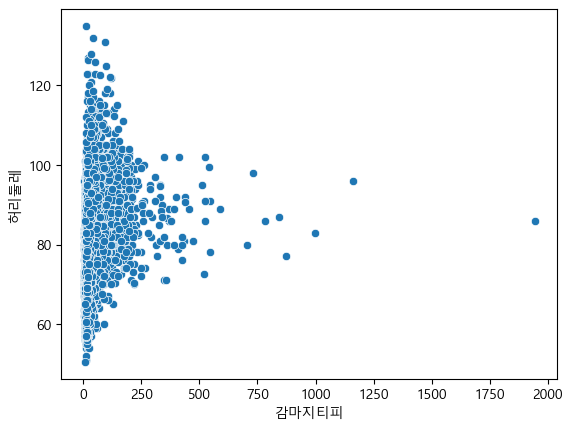

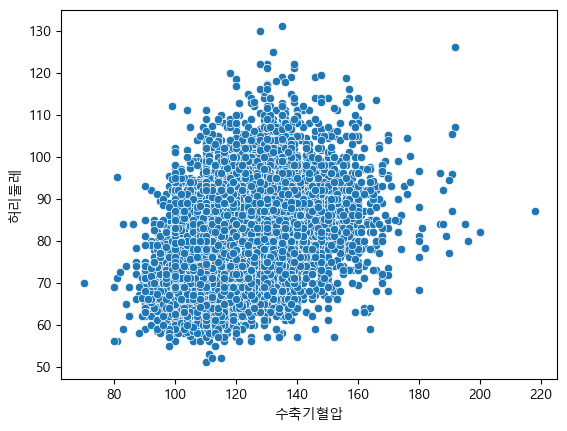

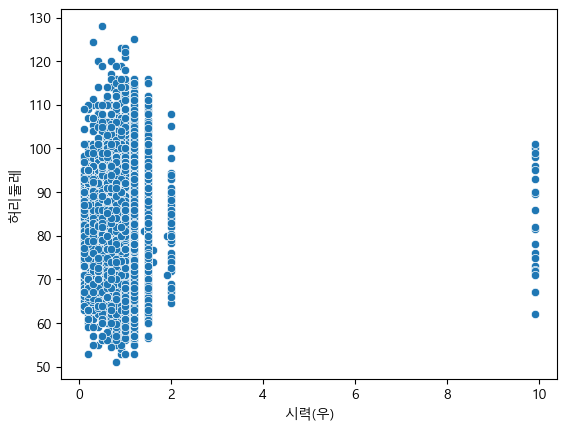

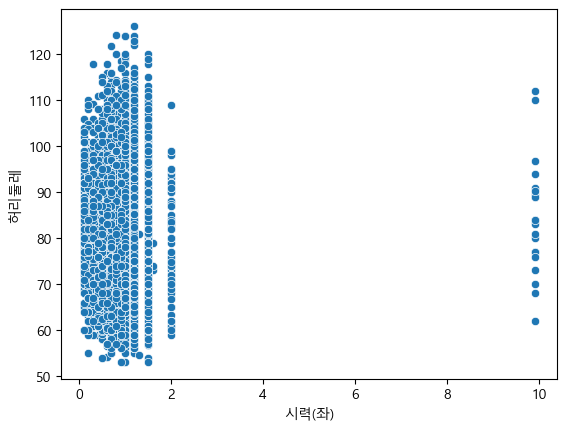

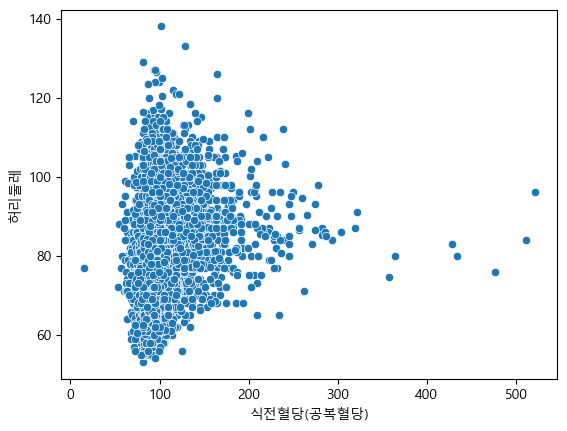

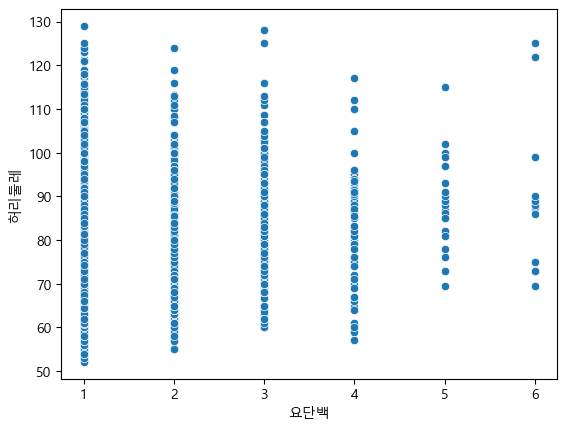

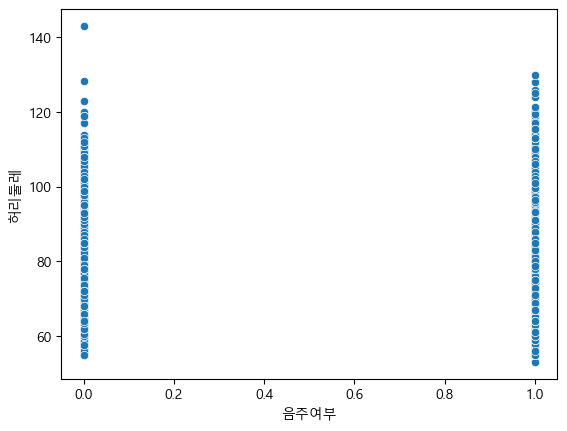

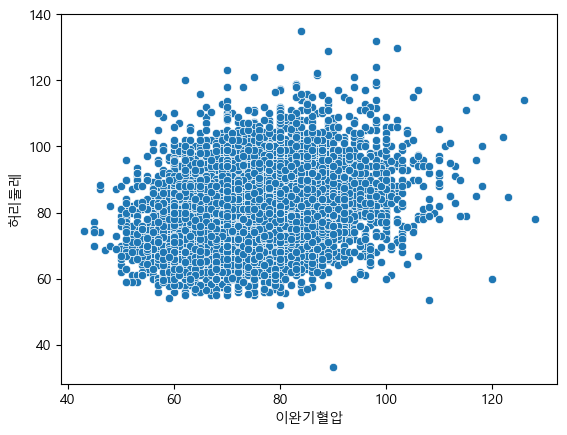

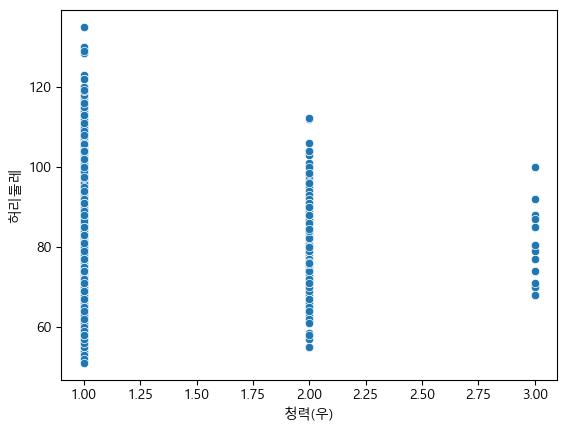

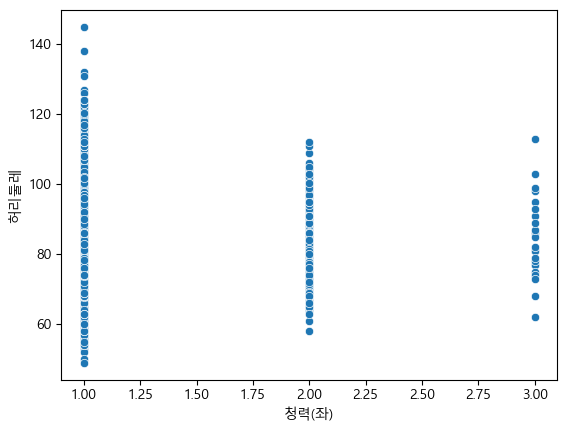

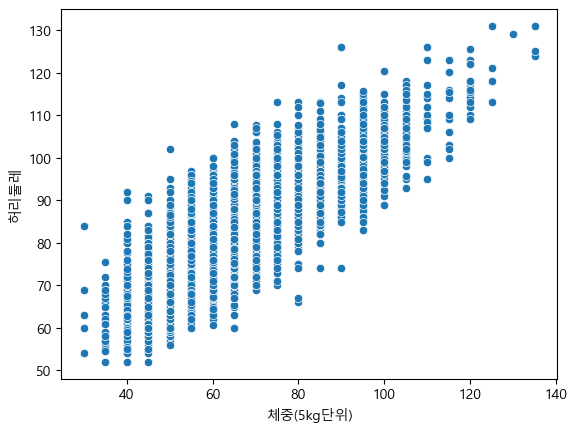

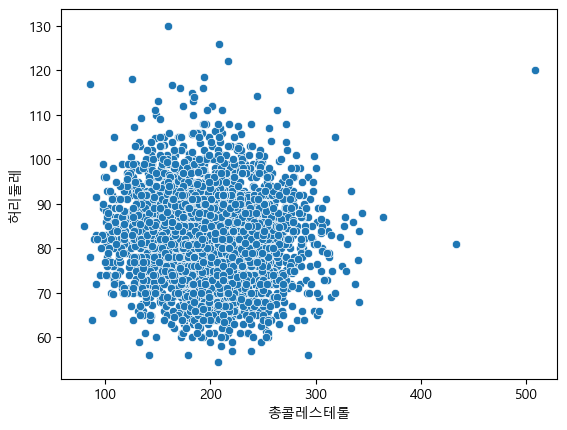

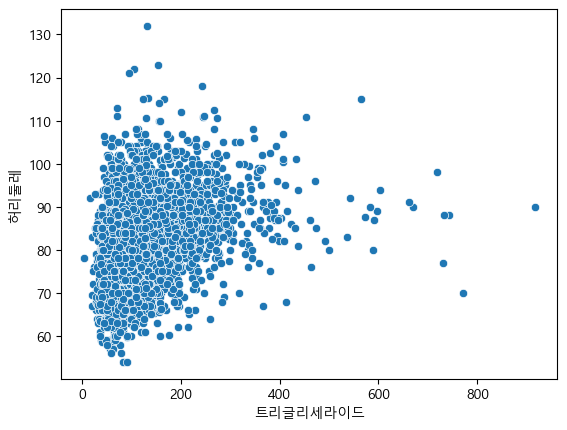

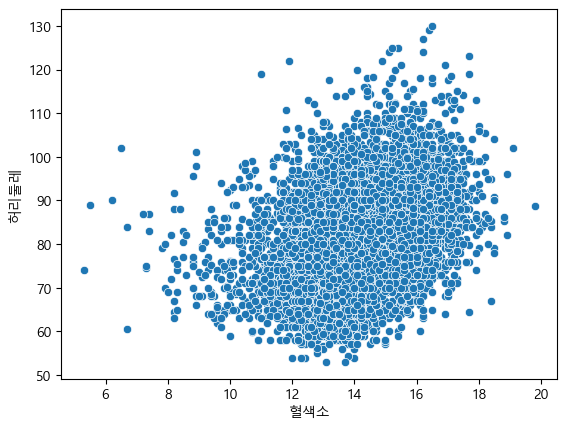

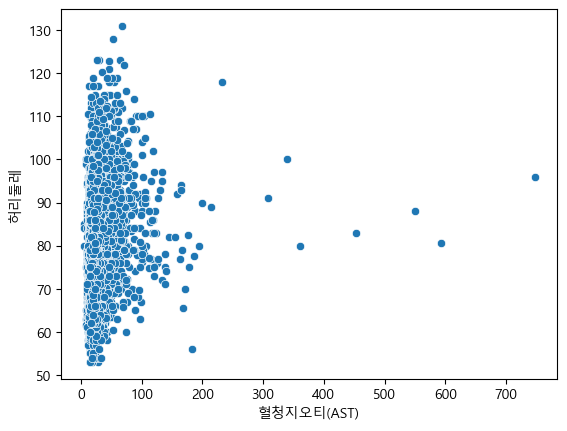

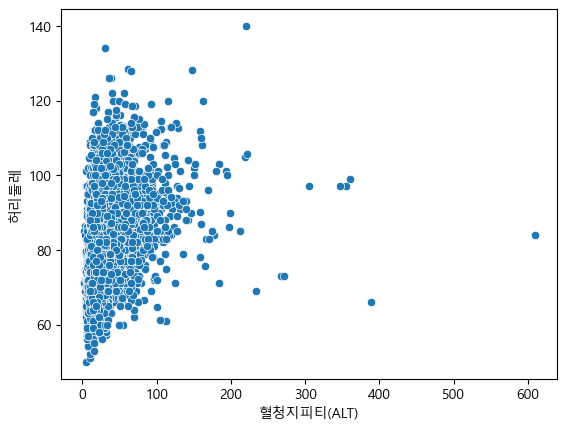

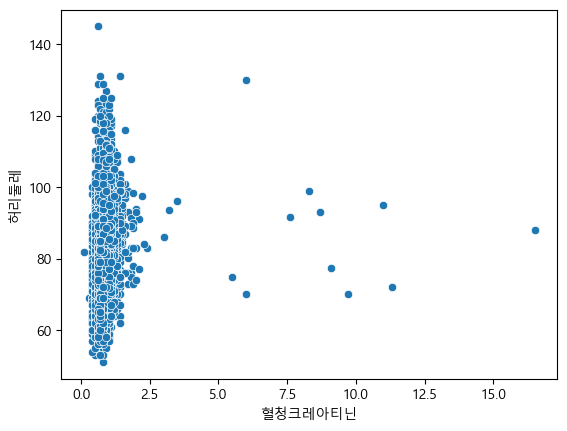

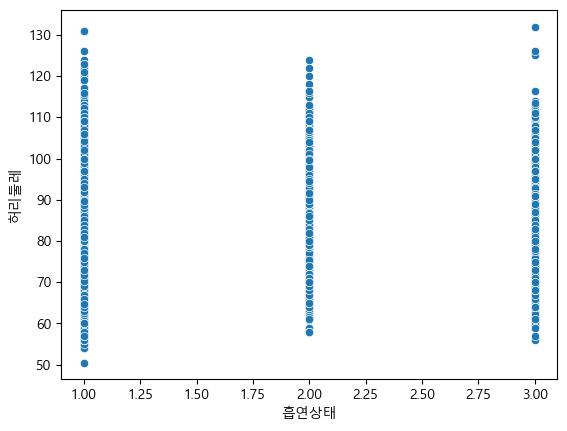

<Figure size 640x480 with 0 Axes>

In [11]:
for column in data.columns[6:].difference(['허리둘레']):
    sns.scatterplot(
        data.sample(n=10000),
        x=column,
        y='허리둘레'
    )
    plt.show()
    plt.clf()

In [15]:
data = data.filter(
    items=['허리둘레', '체중(5kg단위)', 'HDL콜레스테롤', '수축기혈압', '이완기혈압', '혈색소', '음주여부', '흡연상태'],
)
data = data.dropna()
print(data.shape)
data = data.drop_duplicates()
print(data.shape)
data = data.rename(columns={'체중(5kg단위)': '체중'})
data = data.reset_index(drop=True)

(338534, 8)
(338452, 8)


In [35]:
model = sm.OLS.from_formula(
    '허리둘레 ~ scale(체중) + scale(HDL콜레스테롤) + scale(수축기혈압) + scale(이완기혈압) + scale(혈색소) + C(음주여부) + C(흡연상태)',
    data,
    ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   허리둘레   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                 8.460e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:02:19   Log-Likelihood:            -1.0833e+06
No. Observations:              338452   AIC:                         2.167e+06
Df Residuals:                  338443   BIC:                         2.167e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          83.3727      0.018   4551.611      0.000      83.337      83.409
C(음주여부)[T.1.0]     -1.7593      0.023    -76.599      0.000      -1.804      -1.714
C(흡연상태)[T.2.0]      0.3556      0.029     12.229      0.000       0.299       0.413
C(흡연상태)[T.3.0]     -0.2105      0.030     -7.102      0.000      -0.269      -0.152
scale(체중)           7.9484      0.013    625.564      0.000       7.924       7.973
scale(HDL콜레스테롤)    -1.0701      0.011    -96.685      0.000      -1.092      -1.048
scale(수축기혈압)        1.6254      0.014    114.607      0.000       1.598       1.653
scale(이완기혈압)       -0.4726      0.015    -32.565      0.000      -0.501      -0.444
scale(혈색소)         -0.2782      0.012    -22.469      0.000      -0.302      -0.254
==============================================================================
Omnibus:                   598727.389   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      40579653489.265
Skew:                          11.197   Prob(JB):                         0.00
Kurtosis:                    1699.186   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
print(model.resid.mean())           # 단순평균을 통한 확인
print('-'*30)
print(ttest_1samp(model.resid, 0))  # 통계적 가설검정

5.5304985887254895e-14
------------------------------
TtestResult(statistic=5.415740592373672e-12, pvalue=0.9999999999956788, df=338451)


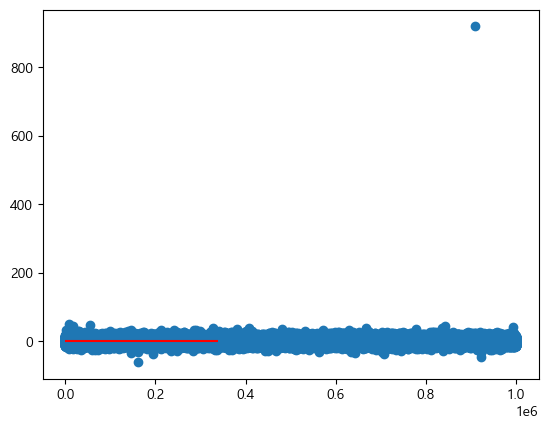

In [20]:
plt.scatter(
    x=model.resid.index,
    y=model.resid
)
plt.hlines(y=0, xmin=0, xmax=len(model.resid), colors='red')

In [36]:
# 이상치 확인
model.resid.loc[model.resid > 800]

307367    919.585915
dtype: float64

In [37]:
model = sm.OLS.from_formula(
    '허리둘레 ~ scale(체중) + scale(HDL콜레스테롤) + scale(수축기혈압) + scale(이완기혈압) + scale(혈색소) + C(음주여부) + C(흡연상태)',
    data.iloc[data.index.difference([307367])],
    ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   허리둘레   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                 9.106e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:02:50   Log-Likelihood:            -1.0709e+06
No. Observations:              338451   AIC:                         2.142e+06
Df Residuals:                  338442   BIC:                         2.142e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          83.3672      0.018   4721.486      0.000      83.333      83.402
C(음주여부)[T.1.0]     -1.7532      0.022    -79.186      0.000      -1.797      -1.710
C(흡연상태)[T.2.0]      0.3541      0.028     12.632      0.000       0.299       0.409
C(흡연상태)[T.3.0]     -0.2146      0.029     -7.511      0.000      -0.271      -0.159
scale(체중)           7.9426      0.012    648.473      0.000       7.919       7.967
scale(HDL콜레스테롤)    -1.0743      0.011   -100.693      0.000      -1.095      -1.053
scale(수축기혈압)        1.6257      0.014    118.910      0.000       1.599       1.652
scale(이완기혈압)       -0.4695      0.014    -33.565      0.000      -0.497      -0.442
scale(혈색소)         -0.2693      0.012    -22.571      0.000      -0.293      -0.246
==============================================================================
Omnibus:                     6710.491   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8530.192
Skew:                           0.270   Prob(JB):                         0.00
Kurtosis:                       3.560   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
print(model.resid.mean())           # 단순평균을 통한 확인
print('-'*30)
print(ttest_1samp(model.resid, 0))  # 통계적 가설검정

-7.71435721896119e-15
------------------------------
TtestResult(statistic=-7.836751371988511e-13, pvalue=0.9999999999993747, df=338450)


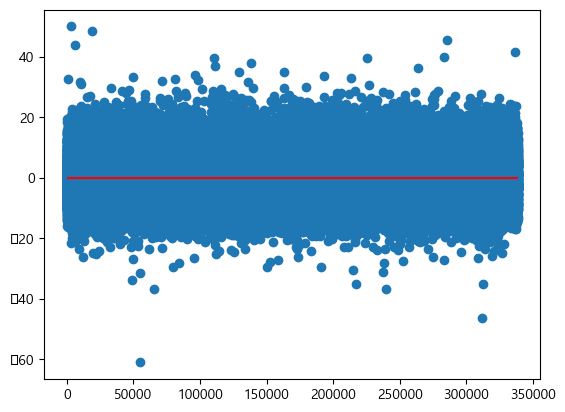

In [39]:
plt.scatter(
    x=model.resid.index,
    y=model.resid
)
plt.hlines(y=0, xmin=0, xmax=len(model.resid), colors='red')

In [59]:
# 전체 데이터 사용
lasso = Lasso(alpha=2).fit(data.drop(columns=['허리둘레']), data.허리둘레)
lasso.coef_

array([ 0.54246021, -0.07247612,  0.09096296, -0.00749396, -0.        ,
       -0.        , -0.        ])

In [58]:
train, test = train_test_split(data, test_size=0.2)
lasso = Lasso(alpha=2).fit(train.drop(columns=['허리둘레']), train.허리둘레)
lasso.coef_

array([ 0.54316607, -0.07193762,  0.0915094 , -0.00798267, -0.        ,
       -0.        , -0.        ])

In [70]:
# RMSE = sqrt((y_true - y_pred)**2 / n)
print('train loss', np.sqrt(((lasso.predict(train.drop(columns=['허리둘레'])) - train.허리둘레)**2).sum()/len(train)))
print('test loss', np.sqrt(((lasso.predict(test.drop(columns=['허리둘레'])) - test.허리둘레)**2).sum()/len(test)))

train loss 6.075490736945458
test loss 5.8241627121145365


# 로지스틱 회귀분석

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [125]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from statsmodels.formula.api import logit, mnlogit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
plt.rcParams['font.family'] ='Malgun Gothic'

## Logistic Regression

회귀분석에서의 기본 가정(정규분포, 연속형 변수 등)이 충족되지 않을 때 사용하는 방법 <br>
일반화 선형모형이라고 부르며, 연결함수가 logit인 경우 logistic regression이라고 부름

Y (target)의 값이 연속형 변수가 아니라 범주형 변수일 때 사용 (연속성 미충족) <br>

Equation <br>
Linear Regression: $ Y = \beta_0 + x_1\beta_1 + ... + x_k\beta_k $ <br>
Logistic Regression: $ P(Y=k) = \beta_0 + x_1\beta_1 + ... + x_k\beta_k $

위에서 P(Y)는 Logistic Function으로, sigmoid함수 사용 <br>
위의 식을 아래와 같이 정리할 수 있음 <br>
$ Y = \frac {exp(\beta_0 + x_1\beta_1 + ... + x_k\beta_k)}{1 + exp(\beta_0 + x_1\beta_1 + ... + x_k\beta_k)} $

<br>

<left><img src="https://editor.analyticsvidhya.com/uploads/71562linear_vs_logistic_regression_edxw03.png" alt="Linear Regression vs Logistic Regression" width="800"></left>

Y 범주가 0과 1로 이루어진 범주형 변수일 때 Linear Regression (좌)와 Logistic Regression (우)의 모습 <br>
X가 특정 값보다 작을 때 0이라는 값으로 예측하고, 큰 경우 1로 예측하고 싶음 <br>

<br>

<left><img src="https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png" alt="logistic" width="500" height="300"></left>

만약 위와 같은 분포를 가질 경우 Linear Regression으로 이 데이터를 설명하기가 매우 어려움
이럴 때, Logistic Regression을 사용하여 해당 데이터를 모델링

## Logistic Function

로지스틱함수는 음의 무한대부터 양의 무한대까지의 값을 0~1사이의 값으로 대응시키는 함수 <br>
보통은 시그모이드 함수를 사용

<left><img src="http://theyoonicon.com/wp-content/uploads/2017/06/sigmoid.png" alt="sigmoid" width="400" height="200"></left>

## Odds

사건 A가 발생하지 않을 확률 대비 일어날 확률의 비 <br>
$ odds = \frac{P(A)}{P(A^c)} = \frac{P(A)}{1 - P(A)} $ <br>

우리의 예측은 0~1사이의 값을 갖음 <br>
만일 에측 결과가 0.02 (y=1), 0.01 (y=0)가 나왔을 경우와 0.002 (y=1), 0.001 (y=0)가 나왔을 경우 <br>
전자는 실패 대비 성공의 차이 0.01이고, 후자는 0.001로 그 차이가 무려 10배 <br>
하지만 비율로 보자면 똑같이 2배 <br>
소수 단위에서 단순히 차를 가지고 설명하기에는 그 의미를 전달하는 데 한계가 있어 둘의 비율로 얘기하는 것이 Odds Ratio (오즈비)


## Modeling

기본적인 사용방법은 linear regression때와 동일

```python
model = logit("y ~ x", data).fit()
```
<br>

위의 from_formula는 다양한 활용 가능 <br>
- scale 
```python
model = logit("y ~ scale(x)", data).fit()
```
- $x^2$
```python
model = logit("y ~ I(x ** 2)", data).fit()
```
- 범주화
```python
model = logit("y ~ C(x)", data).fit()
```
<br>



모델 결과는 아래의 내용으로 해석
- Pseudo R-squ.
설명하고자 하는 y를 주어진 독립변수로 얼마 정도 설명할 수 있는지 나타내는 지표 <br>
범위는 0에서 1사이의 값으로 0이면 모델의 설명력이 전혀 없는 상태이고, 1에 가까울수록 모델이 데이터를 잘 설명 <br>
다만, 추정 방식이 OLS가 아니고 LL이기에 R-square를 직접 도출할 수 없어 Pseuudo를 붙임
- Log-Likelihood
모형의 적합도를 나타내는 통계량
- LL-Null
모형 검증의 Null Hypothesis (영가설, 귀무가설)이 되는 decision criterion
- LLR p-value
위에서 구한 가설검정 결과
<br>
<br>
- coef
데이터로 추정한 각 독립변수의 계수 <br>
coef는 log odds임을 주의
- t
추정 계수의 t 통계량
- P>|t|  
p-value라고도 하며 위의 통계량을 통해 얻은 값 <br>
유의수준과 비교하여 유의수준보다 작으면 해당 추정 계수가 유의
- [0.025      0.975]
해당 계수의 95% 신뢰구간에 해당하는 상, 하한 값 <br>
만일 이 범위에 0을 포함하면 해당 계수는 유의하지 않다고 판단
<br>

In [72]:
penguins = sns.load_dataset('penguins').dropna()
print(penguins.shape)
penguins = penguins.drop_duplicates()
print(penguins.shape)

(333, 7)
(333, 7)


In [94]:
char_to_index = dict(zip(penguins.species.unique(), range(3)))
penguins.species = penguins.species.apply(lambda x: char_to_index.get(x))

In [123]:
# Binary: 0, 1의 label
model = logit('species ~ C(island) + C(sex) + scale(bill_length_mm) + scale(bill_depth_mm) + scale(flipper_length_mm) + scale(body_mass_g)', penguins.query('species != 2')).fit()
model.summary()

         Current function value: 0.000000
         Iterations: 35


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                species   No. Observations:                  214
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                   1.000
Time:                        12:01:06   Log-Likelihood:            -5.2361e-05
converged:                      False   LL-Null:                       -133.79
Covariance Type:            nonrobust   LLR p-value:                 5.014e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -23.3426   3670.406     -0.006      0.995   -7217.207    7170.521
C(island)[T.Dream]         -15.1187   2460.223     -0.006      0.995   -4837.068    4806.831
C(island)[T.Torgersen]     -21.1651   1886.822     -0.011      0.991   -3719.268    3676.938
C(sex)[T.Male]             -26.4645   4.28e+04     -0.001      1.000   -8.38e+04    8.38e+04
scale(bill_length_mm)      124.8525   1.09e+04      0.011      0.991   -2.12e+04    2.15e+04
scale(bill_depth_mm)       -40.4819   4369.986     -0.009      0.993   -8605.497    8524.533
scale(flipper_length_mm)    -1.7957   1215.154     -0.001      0.999   -2383.454    2379.863
scale(body_mass_g)         -19.3895   2459.565     -0.008      0.994   -4840.049    4801.270
============================================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

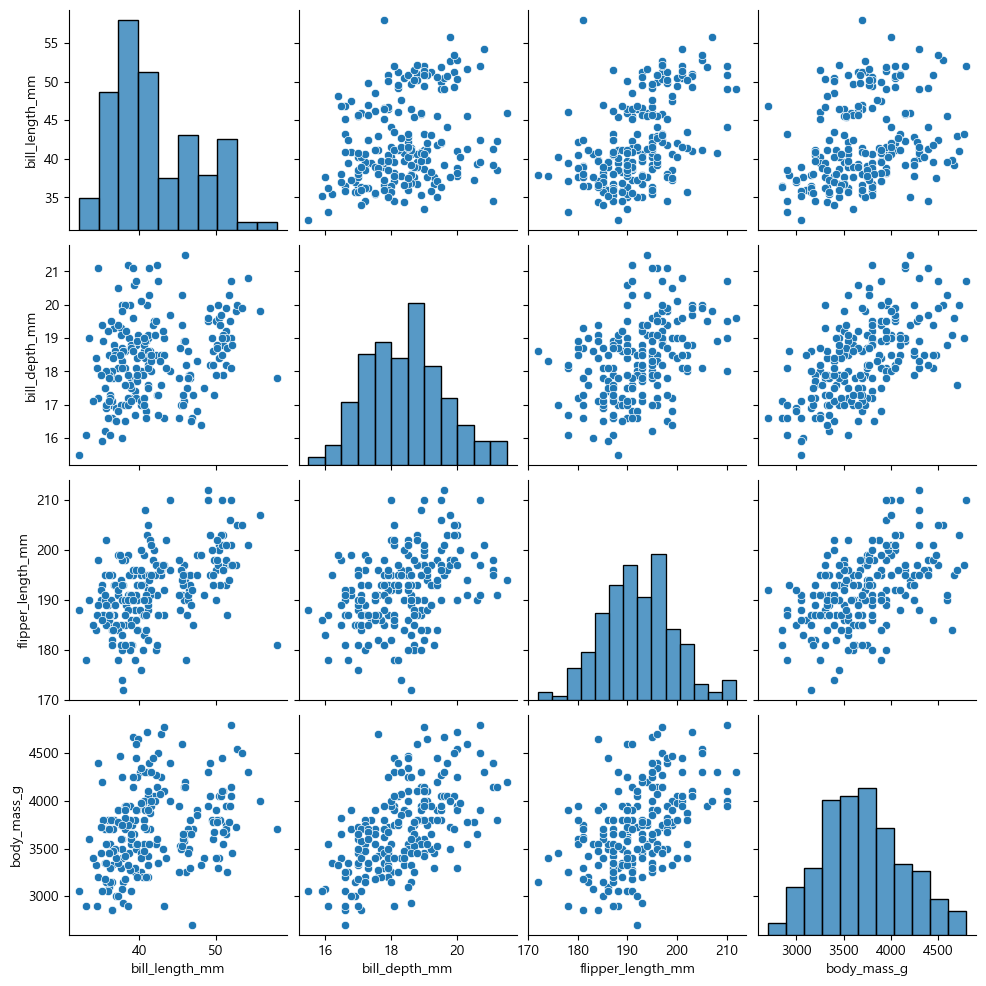

In [151]:
sns.pairplot(penguins.query('species!=2').iloc[:, 2:6])

<Axes: xlabel='bill_depth_mm', ylabel='Density'>

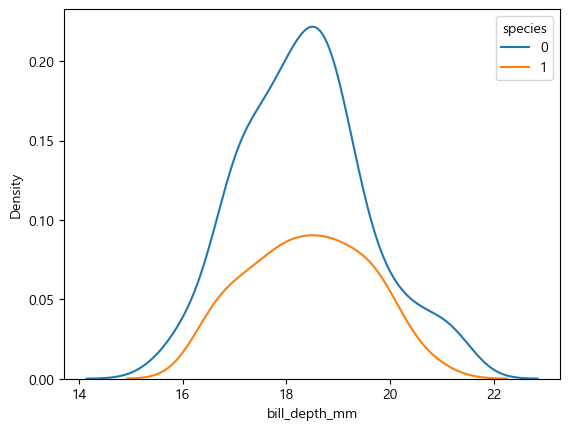

In [165]:
sns.kdeplot(
    penguins.query('species != 2'),
    x='bill_depth_mm',
    hue='species',
)

<Axes: xlabel='bill_length_mm', ylabel='Density'>

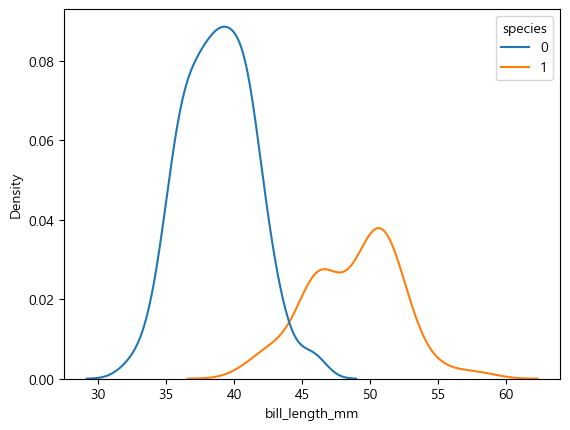

In [164]:
sns.kdeplot(
    penguins.query('species != 2'),
    x='bill_length_mm',
    hue='species',
)

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

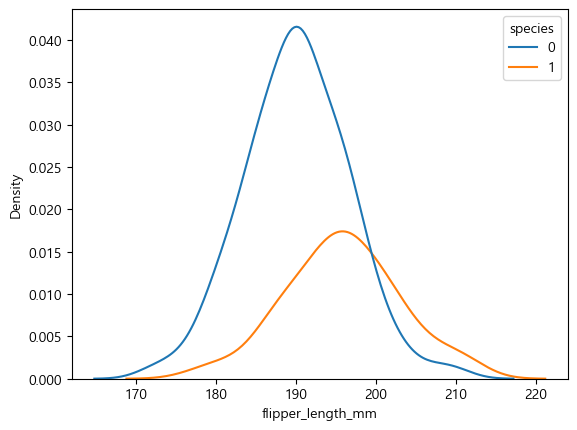

In [166]:
sns.kdeplot(
    penguins.query('species != 2'),
    x='flipper_length_mm',
    hue='species',
)

<Axes: xlabel='body_mass_g', ylabel='Density'>

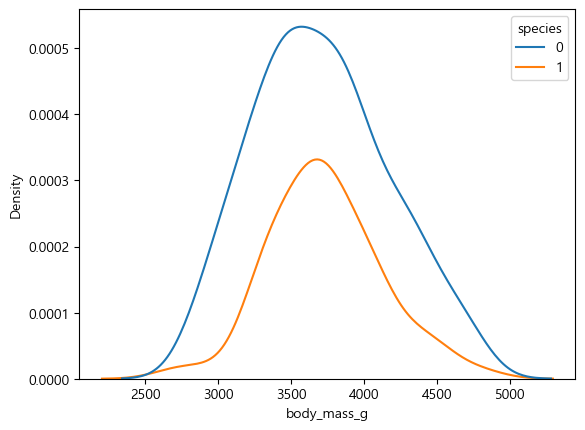

In [167]:
sns.kdeplot(
    penguins.query('species != 2'),
    x='body_mass_g',
    hue='species',
)

In [173]:
# Binary: 0, 1의 label
model = logit('species ~ scale(bill_length_mm)', penguins.query('species != 2')).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.117498
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                species   No. Observations:                  214
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                  0.8121
Time:                        12:30:18   Log-Likelihood:                -25.145
converged:                       True   LL-Null:                       -133.79
Covariance Type:            nonrobust   LLR p-value:                 3.541e-49
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.1654      0.469     -4.619      0.000      -3.084      -1.247
scale(bill_length_mm)     5.7163      0.975      5.864      0.000       3.806       7.627
=========================================================================================
"""

In [127]:
model = mnlogit('species ~ C(island) + C(sex) + scale(bill_length_mm) + scale(bill_depth_mm) + scale(flipper_length_mm) + scale(body_mass_g)', penguins).fit()
model.summary()

Optimization terminated successfully.
         Current function value: nan
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                species   No. Observations:                  333
Model:                        MNLogit   Df Residuals:                      323
Method:                           MLE   Df Model:                            8
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                     nan
Time:                        12:06:58   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -350.86
Covariance Type:            nonrobust   LLR p-value:                       nan
============================================================================================
               species=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                       nan        nan        nan        nan         nan         nan
scale(bill_length_mm)           nan        nan        nan        nan         nan         nan
scale(bill_depth_mm)            nan        nan        nan        nan         nan         nan
scale(flipper_length_mm)        nan        nan        nan        nan         nan         nan
scale(body_mass_g)              nan        nan        nan        nan         nan         nan
--------------------------------------------------------------------------------------------
               species=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                       nan        nan        nan        nan         nan         nan
scale(bill_length_mm)           nan        nan        nan        nan         nan         nan
scale(bill_depth_mm)            nan        nan        nan        nan         nan         nan
scale(flipper_length_mm)        nan        nan        nan        nan         nan         nan
scale(body_mass_g)              nan        nan        nan        nan         nan         nan
============================================================================================
"""

## Machine Learning Logistic Regression

> ```python
> from sklearn.linear_model import LogisticRegression
> 
> model = LogisticRegression().fit(X, y)
> model.score(X, y) # R square
> model.predict(X)  # predict on X
> ```

In [175]:
train, test = train_test_split(penguins, test_size=0.3)
model = LogisticRegression().fit(train.drop(columns=['species', 'island', 'sex']), train.species)

In [111]:
(model.predict(test.drop(columns=['species', 'island', 'sex'])) == test.species.values).mean()

0.98

Text(51.722222222222214, 0.5, 'Ground Truth')

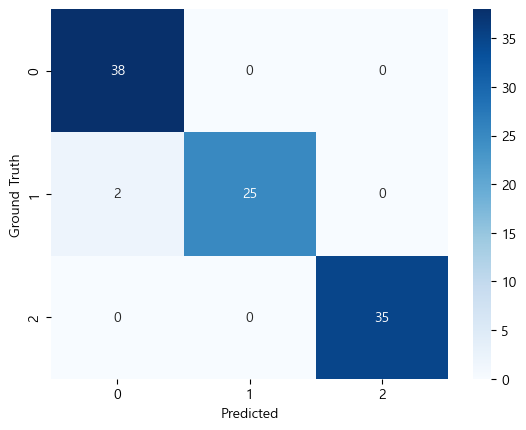

In [176]:
sns.heatmap(
    confusion_matrix(
        test.species.values,
        model.predict(test.drop(columns=['species', 'island', 'sex'])),
    ),
    annot=True,
    cmap='Blues',
)
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [180]:
titanic = sns.load_dataset('titanic')

<Axes: xlabel='age', ylabel='Density'>

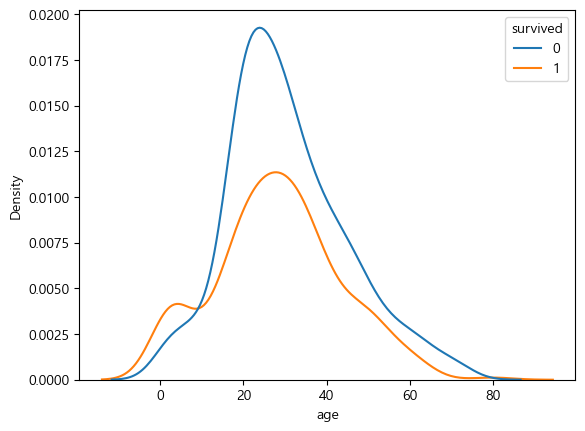

In [189]:
# 정보성이 있는 변수 선택
sns.kdeplot(
    titanic,
    x='age',
    hue='survived'
)

<Axes: xlabel='fare', ylabel='Density'>

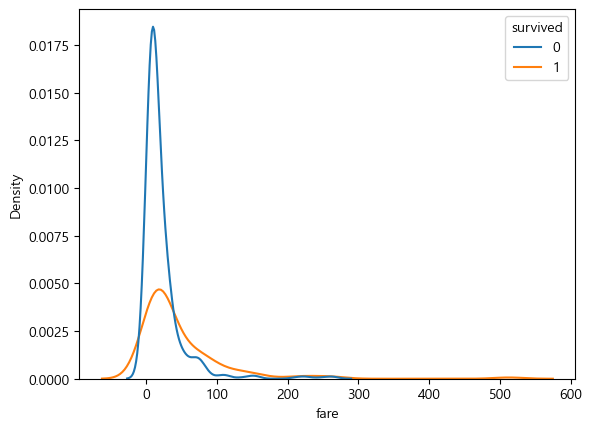

In [191]:
sns.kdeplot(
    titanic,
    x='fare',
    hue='survived'
)

<Axes: xlabel='pclass', ylabel='count'>

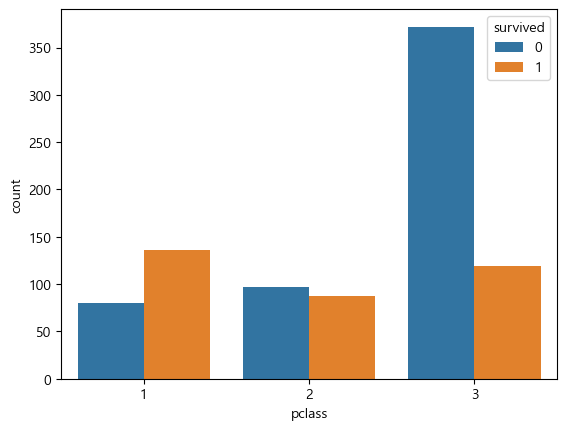

In [193]:
sns.countplot(
    titanic,
    x='pclass',
    hue='survived'
)

<Axes: xlabel='sex', ylabel='count'>

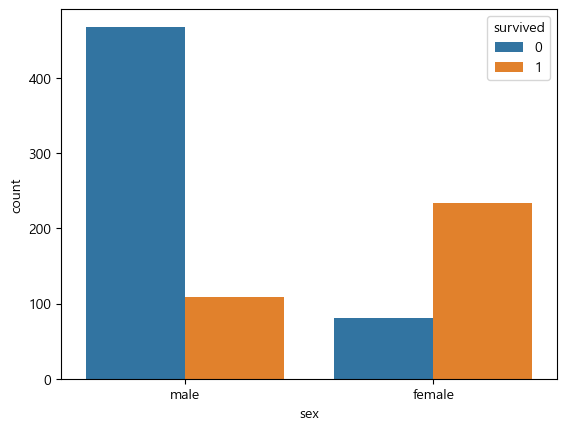

In [195]:
sns.countplot(
    titanic,
    x='sex',
    hue='survived'
)

<Axes: xlabel='sibsp', ylabel='count'>

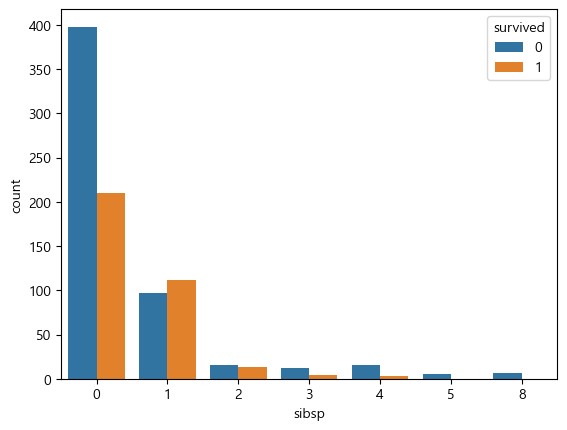

In [198]:
sns.countplot(
    titanic,
    x='sibsp',
    hue='survived'
)

<Axes: xlabel='parch', ylabel='count'>

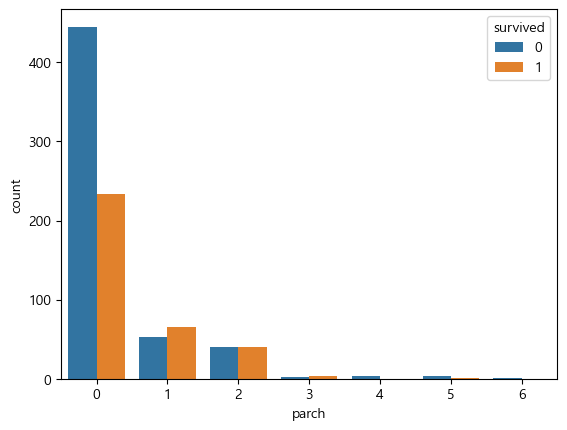

In [200]:
sns.countplot(
    titanic,
    x='parch',
    hue='survived'
)

<Axes: xlabel='embarked', ylabel='count'>

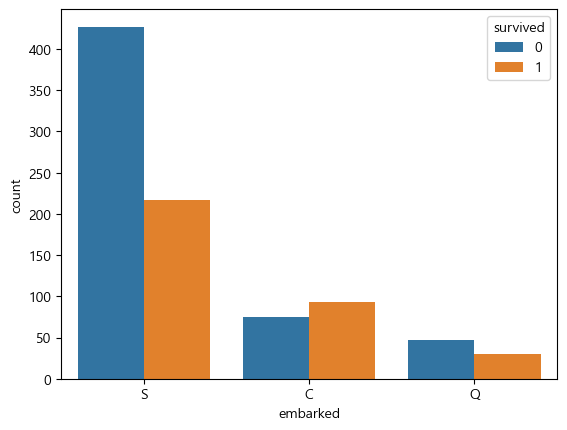

In [202]:
sns.countplot(
    titanic,
    x='embarked',
    hue='survived'
)

<Axes: xlabel='class', ylabel='count'>

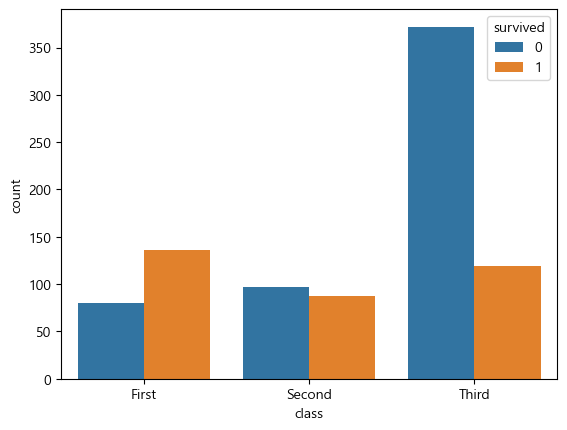

In [203]:
sns.countplot(
    titanic,
    x='class',
    hue='survived'
)

<Axes: xlabel='who', ylabel='count'>

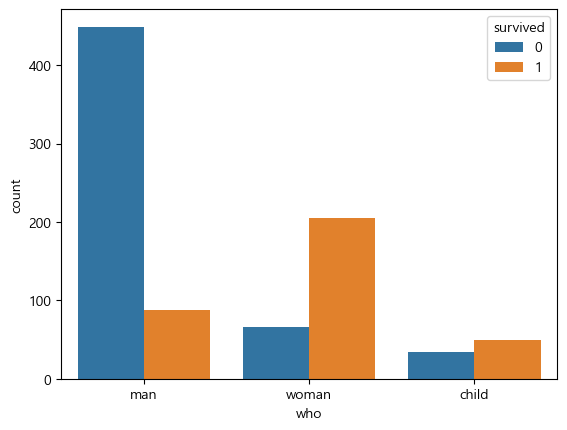

In [204]:
sns.countplot(
    titanic,
    x='who',
    hue='survived'
)

<Axes: xlabel='adult_male', ylabel='count'>

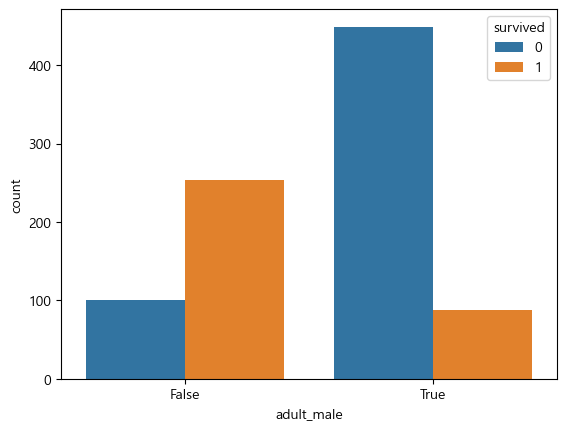

In [205]:
sns.countplot(
    titanic,
    x='adult_male',
    hue='survived'
)

<Axes: xlabel='deck', ylabel='count'>

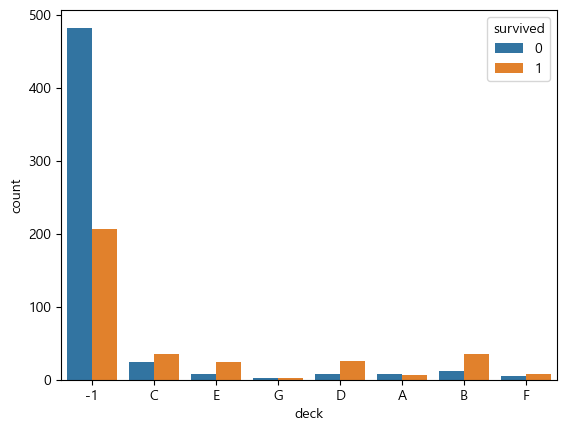

In [222]:
titanic.deck = titanic.deck.astype(str)
titanic.deck = np.where(titanic.deck=='nan', -1, titanic.deck)

sns.countplot(
    titanic,
    x='deck',
    hue='survived'
)

<Axes: xlabel='embark_town', ylabel='count'>

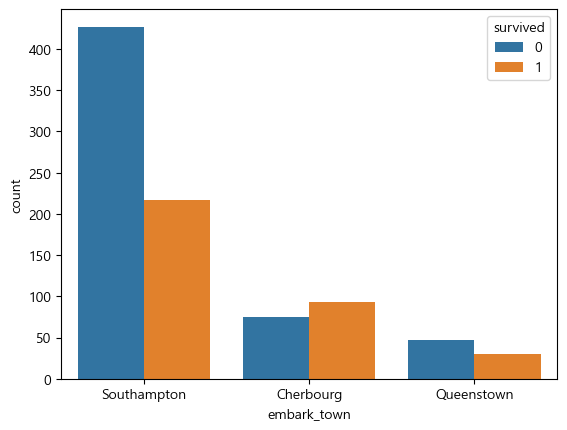

In [223]:
sns.countplot(
    titanic,
    x='embark_town',
    hue='survived'
)

<Axes: xlabel='alone', ylabel='count'>

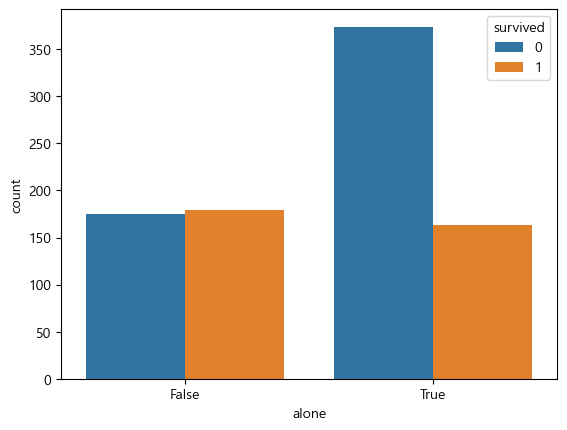

In [226]:
sns.countplot(
    titanic,
    x='alone',
    hue='survived'
)

In [252]:
temp = titanic.drop(columns=['age', 'fare', 'alive']).dropna().rename(columns={'class': 'class_'})
formula = ' + '.join(''.join(['C(', column, ')']) for column in temp.columns[1:].difference(['embark_town', 'pclass', 'class_', 'parch', 'who']))
model = logit(f'survived ~ {formula}', temp).fit()
model.summary()

         Current function value: 0.425365
         Iterations: 35


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      870
Method:                           MLE   Df Model:                           18
Date:                Wed, 04 Sep 2024   Pseudo R-squ.:                  0.3606
Time:                        14:21:39   Log-Likelihood:                -378.15
converged:                      False   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 2.659e-79
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.2106      0.356      3.397      0.001       0.512       1.909
C(adult_male)[T.True]    -3.3991      0.537     -6.329      0.000      -4.452      -2.346
C(alone)[T.True]          0.2519      0.343      0.734      0.463      -0.421       0.925
C(deck)[T.A]              1.4929      0.584      2.556      0.011       0.348       2.638
C(deck)[T.B]              1.7443      0.435      4.009      0.000       0.892       2.597
C(deck)[T.C]              1.3698      0.360      3.800      0.000       0.663       2.076
C(deck)[T.D]              2.1458      0.503      4.265      0.000       1.160       3.132
C(deck)[T.E]              2.3212      0.490      4.734      0.000       1.360       3.282
C(deck)[T.F]              0.8681      0.781      1.111      0.267      -0.663       2.399
C(deck)[T.G]             -0.7378      1.023     -0.721      0.471      -2.742       1.266
C(embarked)[T.Q]         -0.6115      0.383     -1.595      0.111      -1.363       0.140
C(embarked)[T.S]         -0.5405      0.243     -2.223      0.026      -1.017      -0.064
C(sex)[T.male]            0.3097      0.514      0.603      0.547      -0.697       1.316
C(sibsp)[T.1]             0.1353      0.348      0.389      0.697      -0.546       0.817
C(sibsp)[T.2]             0.2581      0.618      0.418      0.676      -0.952       1.469
C(sibsp)[T.3]            -1.9085      0.687     -2.778      0.005      -3.255      -0.562
C(sibsp)[T.4]            -2.4037      0.775     -3.100      0.002      -3.924      -0.884
C(sibsp)[T.5]           -22.9174   2.67e+04     -0.001      0.999   -5.23e+04    5.23e+04
C(sibsp)[T.8]           -22.6538   3.33e+04     -0.001      0.999   -6.53e+04    6.52e+04
=========================================================================================
"""

In [281]:
temp = titanic.drop(columns=['age', 'fare', 'alive']).dropna().rename(columns={'class': 'class_'})

temp.pclass = temp.pclass.astype(object)
temp.sibsp = temp.sibsp.astype(object)
temp.parch = temp.parch.astype(object)
temp.class_ = temp.class_.astype(object)
temp.alone = temp.alone.astype(object)
temp.adult_male = temp.adult_male.astype(object)

In [282]:
label_encoders = {}
for column in temp.select_dtypes(object):
    label_encoder = LabelEncoder().fit(temp[column])
    temp[column] = label_encoder.transform(temp[column])

    label_encoders.update({column: label_encoder})

In [283]:
train, test = train_test_split(temp, test_size=0.3)

In [285]:
model = LogisticRegression().fit(train.iloc[:, 1:], train.iloc[:, 0])

In [288]:
(model.predict(test.iloc[:, 1:]) == test.survived).mean()

0.8239700374531835